# Artifitial Neural Networks

# Dataset : cifar10

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 data
(X, y), (_, _) = cifar10.load_data()

In [3]:
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
y.shape

(50000, 1)

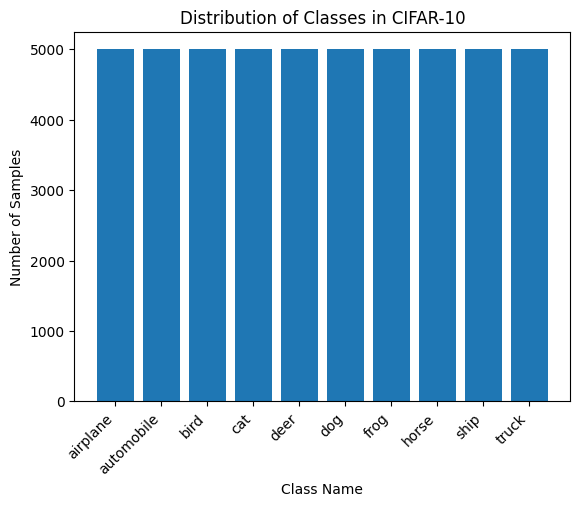

In [5]:
# Count the occurrences of each class in the dataset
class_counts = np.bincount(y[:, 0])

# Get the unique class labels and corresponding class names
class_labels = np.arange(len(class_counts))


# Plot a bar chart with class names
plt.bar(class_labels, class_counts, tick_label=class_names)
plt.xlabel('Class Name')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in CIFAR-10')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [6]:
X.shape

(50000, 32, 32, 3)

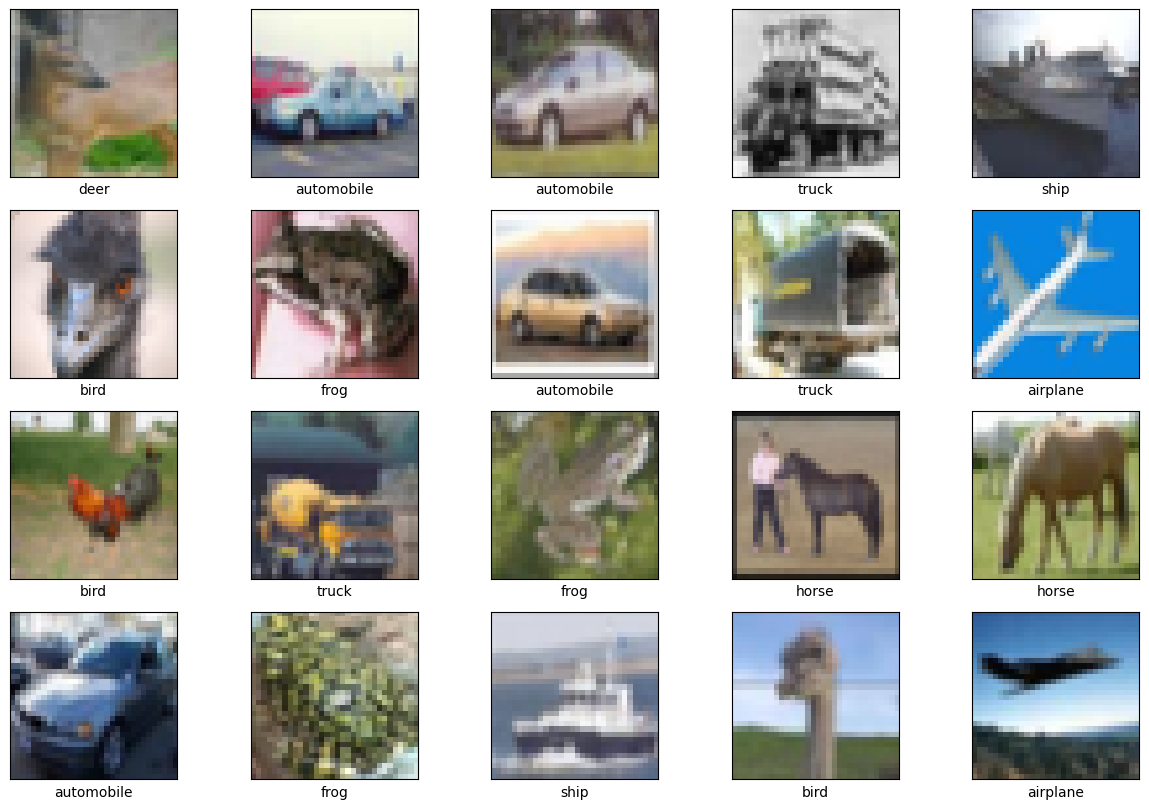

In [7]:
# Assuming X and y are already loaded from cifar10.load_data()
num_images_to_display = 20

# Generate random indices for 20 images
random_indices = np.random.choice(len(X), num_images_to_display, replace=False)

# Plot the random images
plt.figure(figsize=(15, 10))
for i, index in enumerate(random_indices):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[index])

    # Map numeric label to class name directly
    class_name = class_names[y[index][0]]

    plt.xlabel(f'{class_name}')

plt.show()


In [8]:
# Normalize pixel values to be between 0 and 1
X_normalize = X / 255.0

In [9]:
# standardizing the data
# Use tf.image.per_image_standardization to perform per-image standardization
# X_normalize_standardize = tf.image.per_image_standardization(X_normalize)

In [10]:
# X_normalize_standardize.shape

In [11]:
# One-hot encode the labels
y_one_hot = to_categorical(y, num_classes=10)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y_one_hot, test_size=0.2,random_state=42)

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
y_train.shape

(40000, 10)

In [16]:
# ANN initialization
classifier = Sequential([
    # Flatten layer
    Flatten(input_shape=(32, 32, 3)),

    # Hidden layer
    Dense(units=1000, activation='relu'),

    # Dropout layer
    Dropout(0.2),

    # Hidden layer
    Dense(units=100, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])

In [17]:
# Define a custom learning rate
custom_lr = 0.001  # Adjust this value based on your preference

# Create an Adam optimizer with the custom learning rate
custom_optimizer = Adam(learning_rate=custom_lr)

# Compile the model
classifier.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early Stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.001,
#     patience=20,
#     verbose=1,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0,
# )

In [18]:
model = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 13s 6ms/step - loss: 2.0381 - accuracy: 0.2353 - val_loss: 1.8649 - val_accuracy: 0.3068
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8356 - accuracy: 0.3307 - val_loss: 1.7391 - val_accuracy: 0.3676
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7605 - accuracy: 0.3644 - val_loss: 1.6935 - val_accuracy: 0.3932
Epoch 4/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7182 - accuracy: 0.3804 - val_loss: 1.6512 - val_accuracy: 0.4008
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6794 - accuracy: 0.3952 - val_loss: 1.6406 - val_accuracy: 0.4087
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6508 - accuracy: 0.4069 - val_loss: 1.6142 - val_accuracy: 0.4229
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6283 - accuracy: 0.4161 - val_loss: 1.6185 - val_accuracy

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 3174110 (12.11 MB)
Trainable params: 3174110 (12.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
y_pred = classifier.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.6030818e-01, 4.1140553e-02, 1.1604299e-01, ..., 1.2693773e-01,
        1.0829438e-01, 8.4005013e-02],
       [1.2907854e-02, 3.3716969e-02, 7.3854555e-04, ..., 2.0079175e-04,
        9.1420609e-01, 3.5863239e-02],
       [2.4011043e-01, 2.9975466e-02, 2.0884179e-02, ..., 1.0889527e-02,
        6.1168599e-01, 4.3621503e-02],
       ...,
       [8.7026127e-02, 3.0125234e-01, 1.4193131e-03, ..., 7.9108548e-04,
        4.0023011e-01, 2.0450465e-01],
       [1.6642397e-02, 4.4781128e-03, 1.3942382e-01, ..., 2.8680563e-01,
        1.1942255e-03, 7.6334835e-03],
       [2.3114651e-02, 3.4014790e-03, 2.6262197e-01, ..., 8.3213359e-02,
        1.9578096e-03, 6.4637088e-03]], dtype=float32)

In [21]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([0, 8, 8, ..., 8, 4, 4])

In [22]:
y_true_int = np.argmax(y_test, axis=1)
y_true_int

array([7, 8, 0, ..., 8, 2, 6])

In [23]:
accuracy = accuracy_score(y_true_int, y_pred_classes)
accuracy

0.4478

In [24]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

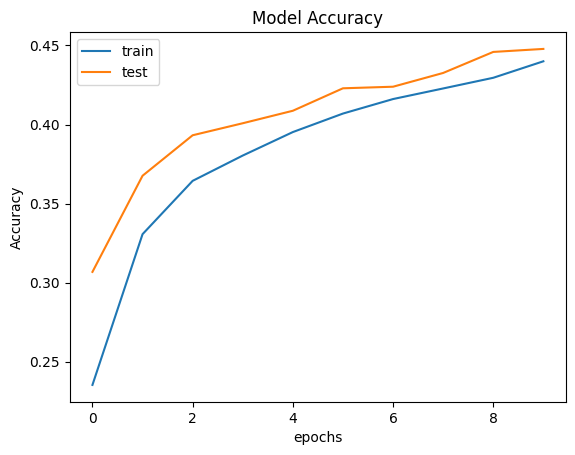

In [25]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='best')
plt.show()

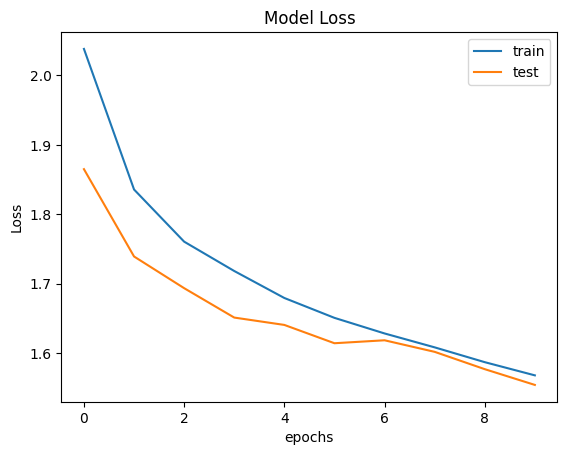

In [26]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='best')
plt.show()